In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_paths = ['./csv/education/australia.csv', './csv/education/finland.csv', './csv/education/france.csv',
              './csv/education/italy.csv', './csv/education/japan.csv', './csv/education/korea.csv',
              './csv/education/netherlands.csv', './csv/education/poland.csv', './csv/education/singapore.csv',
              './csv/education/switerland.csv']

In [3]:
def read_and_transform_csv(file_paths):
    list_of_dataframes = {}
    for path in file_paths:
        name = path.split('/')[-1].split('.')[0]
        df = pd.read_csv(path)

        df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
        df['Value'].fillna(0, inplace=True)
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
        df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')

        df.dropna(inplace=True)
        df.reset_index(drop=True, inplace=True)
        list_of_dataframes[name] = df
    return list_of_dataframes

lista = read_and_transform_csv(file_paths)

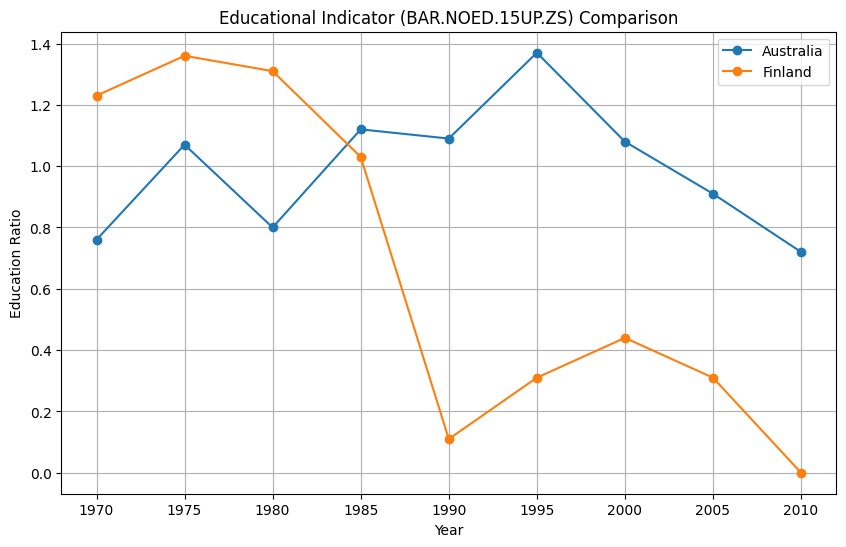

In [6]:

countries = ['australia', 'finland']

indicator_code = 'BAR.NOED.15UP.ZS'

plt.figure(figsize=(10, 6))


for country in countries:
    df_country = lista[country]
    df_indicator = df_country[df_country['Indicator Code'] == indicator_code]

    plt.plot(df_indicator['Year'], df_indicator['Value'], marker='o', label=country.capitalize())


plt.xlabel('Year')
plt.ylabel('Education Ratio')
plt.title(f'Educational Indicator ({indicator_code}) Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
lista['australia'].Year.dt.year

0        2010
1        2005
2        2000
3        1995
4        1990
         ... 
13634    1964
13635    1963
13636    1962
13637    1961
13638    1960
Name: Year, Length: 13639, dtype: int32